In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/data/train3.csv") #데이터 파일 로딩
df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
0,0,0,1,1,22.0,7.2500,0
1,1,0,0,0,38.0,71.2833,1
2,0,0,1,0,26.0,7.9250,1
3,1,0,0,0,35.0,53.1000,1
4,0,0,1,1,35.0,8.0500,0


In [2]:
df.columns #필드 목록

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [3]:
df.shape #데이터셋의 형태

(891, 7)

In [4]:
df.describe() #기초 통계량

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.242424,0.206510,0.551066,0.647587,29.758889,32.204208,0.383838
std,0.428790,0.405028,0.497665,0.477990,13.002570,49.693429,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,0.000000,1.000000,1.000000,30.000000,14.454200,0.000000
75%,0.000000,0.000000,1.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,80.000000,512.329200,1.000000


In [5]:
df.groupby("Survived").mean() #클래스별 평균값

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare
Survived,,,,,,
0,0.145719,0.176685,0.677596,0.852459,30.483607,22.117887
1,0.397661,0.254386,0.347953,0.318713,28.595526,48.395408


In [6]:
df["Survived"].value_counts() #클래스별 샘플 갯수

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, '분류\n(0:사망, 1:생존)')

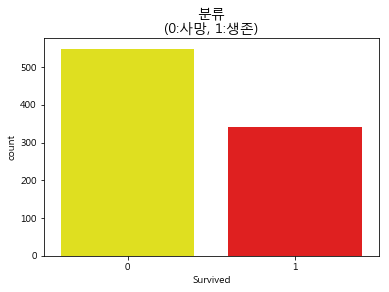

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)
colors=["yellow","red"]
sns.countplot("Survived",data=df,palette=colors) #카운트 플롯
plt.title("분류\n(0:사망, 1:생존)",fontsize=14)

In [8]:
train_cols=df.columns[0:6]
X=df[train_cols] #독립변수
y=df["Survived"] #종속변수

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC2E390>,
      dtype=object)

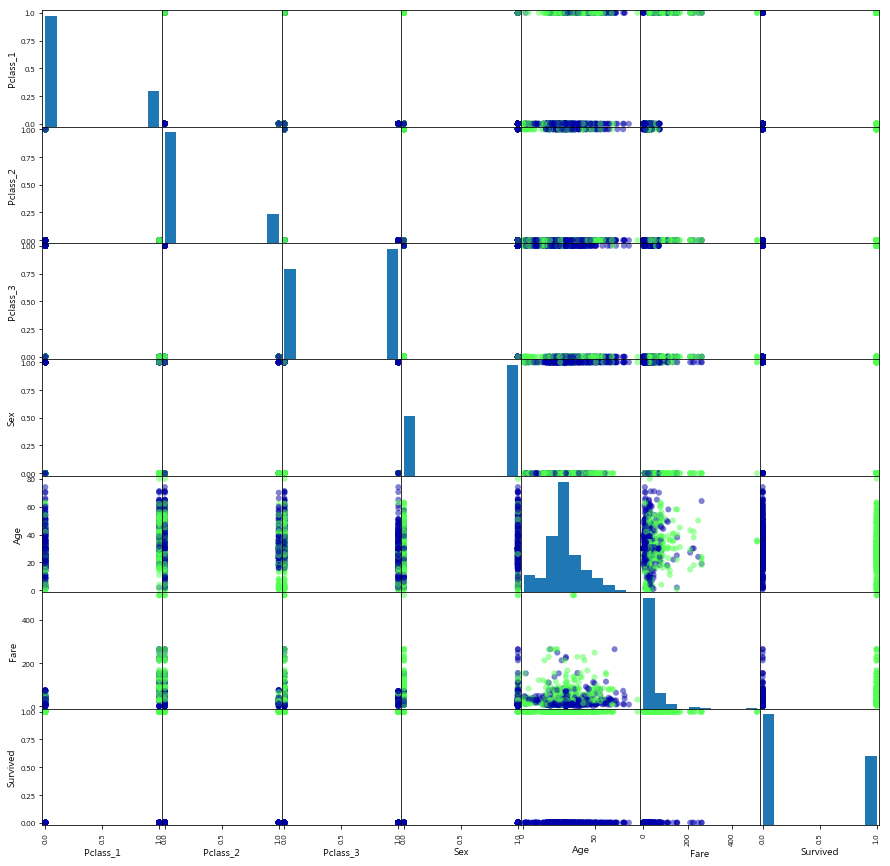

In [9]:
#산점도 행렬
import mglearn
pd.plotting.scatter_matrix(df,c=y,figsize=(15,15),marker="o",
                          cmap=mglearn.cm3)

In [10]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["Survived"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df2["Survived"].value_counts()

1    342
0    342
Name: Survived, dtype: int64

In [12]:
X=X_samp[train_cols]
y=y_samp["Survived"]

In [13]:
#데이터셋 구분 8:2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
    stratify=y,random_state=0)

In [14]:
#svm 모형 생성
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
#과적합 문제

0.8793418647166362
0.7299270072992701


In [16]:
#전처리(변수 표준화)
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training) / range_on_training
X_test_scaled=(X_test - min_on_training) / range_on_training

In [17]:
model=SVC(random_state=10)
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.7696526508226691
0.781021897810219


최적의 C: 1000
최적의 gamma: 0.1
최적의 정확도: 0.8175182481751825


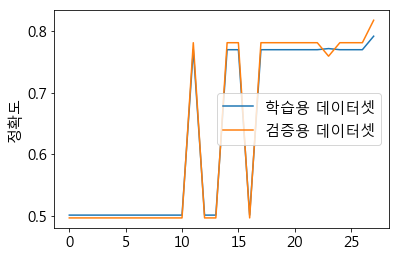

In [19]:
#최적의 C, gamma를 찾는 과정
import numpy as np
train_rate=[]
test_rate=[]

c_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values=[0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        model=SVC(C=n, gamma=g, random_state=20) #svm 모형 생성
        model.fit(X_train_scaled,y_train) #모형 훈련
        train_rate.append([n,g,model.score(X_train_scaled,y_train)])
        test_rate.append([n,g,model.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate) #넘파이 배열로 변환
test_arr=np.array(test_rate) 
max_rate=np.max(test_arr[:,2]) #정확도의 최대값
idx=np.where(test_arr == max_rate)[0][0] #가장 높은 정확도의 인덱스를 찾음
print("최적의 C:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)),train_arr[:,2],label="학습용 데이터셋")
plt.plot(range(len(test_rate)),test_arr[:,2],label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()

In [20]:
#실험을 통해 얻은 최적의 C,gamma value를 사용한 모형
model=SVC(C=1000,gamma=0.1, random_state=10)
model.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.7915904936014625
0.8175182481751825


In [22]:
#오분류표 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred)
cm

array([[55, 14],
       [11, 57]], dtype=int64)

In [23]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,55,14
1,11,57


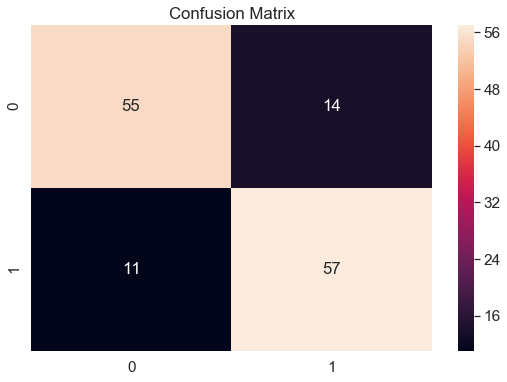

In [24]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm,annot=True,fmt="d")